# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.4MB/s eta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [143]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [2]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [145]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


In [146]:
movies.notnull().all()

title    True
year     True
dtype: bool

## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [3]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [10]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [5]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [6]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [15]:
#All datasets
print(movies.head())
print(cast.head())
print(release_dates.head())
print(movies.shape)

                                          title  year
0                        The Ticket to the Life  2009
1  Parallel Worlds: A New Rock Music Experience  2016
2                     Morita - La hija de Jesus  2008
3                                           Gun  2017
4                        Love or Nothing at All  2014
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN
                    title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                   #BKKY  2016     Cambodia 2017-10-12
2                 #Beings  2015      Rom

In [16]:
len(movies)

244914

### List all Batman movies ever made

In [17]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [19]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [20]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [29]:
release_dates.head()
release_dates[release_dates.title.str.contains('Harry Potter',case=False)].sort_values(by=['date'],ascending=False)

,title,year,country,date
150239,Harry Potter and the Deathly Hallows: Part 2,2011,Zimbabwe,2012-03-01
150238,Harry Potter and the Deathly Hallows: Part 2,2011,Vietnam,2012-02-03
150237,Harry Potter and the Deathly Hallows: Part 2,2011,Cambodia,2011-08-25
150171,Harry Potter and the Deathly Hallows: Part 1,2010,Cambodia,2011-08-18
150236,Harry Potter and the Deathly Hallows: Part 2,2011,China,2011-08-04
150235,Harry Potter and the Deathly Hallows: Part 2,2011,Indonesia,2011-07-29
150234,Harry Potter and the Deathly Hallows: Part 2,2011,Pakistan,2011-07-22
150233,Harry Potter and the Deathly Hallows: Part 2,2011,Venezuela,2011-07-15
150232,Harry Potter and the Deathly Hallows: Part 2,2011,USA,2011-07-15
150231,Harry Potter and the Deathly Hallows: Part 2,2011,UK,2011-07-15


### How many movies were made in the year 2017?

In [30]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [31]:
len(movies[movies.year==2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [61]:
pd.DataFrame(pd.value_counts(movies.year)).sort_index().loc[2000:2018].sum()

year    114070
dtype: int64

### Section I - Q4: How many movies are titled "Hamlet"?

In [68]:
len(movies[movies.title.str.contains('Hamlet')])
# movies.title.apply(lambda x: x.contains('Hamlet'))

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [79]:
movies[((movies.title.str.contains('Hamlet')) & (movies.year>2000))].sort_values(by=['year'])
# (or)
movies.loc[(movies.title.str.contains('Hamlet')) & (movies.year>2000),:].sort_values(by='year')

,title,year
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
141237,Hamlet 2,2008
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [108]:
# pd.value_counts(cast.type[cast.type.notnull()])
# cast.head()
# print(cast.shape)
# (cast.n.notnull()==False).sum()
len(cast[(cast.title.str.contains('Inception',case=False))&((cast.n.notnull())==False)])

36

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [118]:
# print(len(cast))
# print(len(cast[((cast.n.notnull())==False)])+len(cast[((cast.n.notnull())==True)]))\
len(cast[(cast.title.str.contains('Inception',case=False))&((cast.n.notnull())==True)])


51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [122]:
cast[cast.title.str.contains('Inception',case=False) & cast.n.notnull()==True].sort_values(by='n')

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [131]:
cast.head()
set(cast[cast.character.str.contains('Albus Dumbledore',case=False)]['name'])

{'Dane Farwell',
 "George (X) O'Connor",
 'Michael Gambon',
 'Richard Harris',
 'Timothy Tedmanson',
 'Toby Regbo'}

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [138]:
#A.
set(cast[cast.name.str.contains('Keanu Reeves',case=False)]['character'])

{'Alex Wyler',
 'Bob Arctor',
 'Chevalier Danceny',
 'Chris Nadeau',
 'Chris Townsend',
 "Conor O'Neill",
 'Detective Galban',
 'Detective Tom Ludlow',
 'Dogstar',
 'Don John',
 'Donaka Mark',
 'Donnie Barksdale',
 'Dr. Beckham',
 'Eddie Kasalivich',
 'Evan',
 'Griffin',
 'Hank',
 'Harry',
 'Heaver',
 'Henry Torne',
 'Himself',
 'Jack Traven',
 'Jjaks Clayton',
 'John',
 'John Constantine',
 'John Wick',
 'Johnny Mnemonic',
 'Johnny Utah',
 'Jonathan Harker',
 'Julian Gitche',
 'Julian Mercer',
 'Kai',
 'Keanu',
 'Keanu Reeves',
 'Kevin Lomax',
 'Klaatu',
 'Lucas Hill',
 'Marlon',
 'Martin Loader',
 'Matt',
 'Nelson Moss',
 'Neo',
 'Ortiz the Dog Boy',
 'Paul Sutton',
 'Perry Lyman',
 'Ramsey',
 'Ron Petrie',
 'Rupert Marshetta',
 'Scott Favor',
 'Shane Falco',
 'Siddhartha',
 'Ted',
 'The Dream',
 'Tod',
 'Tommy Warneki',
 'Winston Connelly'}

In [204]:
#B.
cast[cast.name.str.contains('Keanu Reeves',case=False) & (cast.year>=1999)].sort_values(by=['year','n']).groupby('year')['character','n'].first()


,character,n
year,,
1999,Neo,1.0
2000,Shane Falco,1.0
2001,Conor O'Neill,1.0
2003,Julian Mercer,3.0
2005,John Constantine,1.0
2006,Alex Wyler,1.0
2008,Detective Tom Ludlow,1.0
2009,Chris Nadeau,16.0
2010,Henry Torne,1.0


In [11]:
# cast[cast.name.str.contains('Keanu Reeves',case=False)].groupby(['year','n']).size()

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [213]:
#A.
cast.head()
cast[(cast.year>=1950) & (cast.year<=1960)].groupby(['type']).agg({'type':'count'})

,type
type,
actor,171302
actress,63333


In [215]:
#B.
cast[(cast.year>=2007) & (cast.year<=2017)].groupby(['type']).agg({'type':'count'})

,type
type,
actor,922782
actress,529631


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [49]:
#A.
cast.head()
cast[(cast.year>=2000) & (cast.n==1) & (cast.n.notnull())].sort_values(by=['year','n']).groupby('year').agg({'n':'count'})

,n
year,
2000,2033
2001,2095
2002,2213
2003,2202
2004,2391
2005,2623
2006,2882
2007,2964
2008,3256


In [52]:
# B.
cast[(cast.year>=2000) & (cast.n!=1) & (cast.n.notnull())].sort_values(by=['year','n']).groupby('year').agg({'n':'count'})

,n
year,
2000,37247
2001,39172
2002,39952
2003,40546
2004,42102
2005,47110
2006,52215
2007,52750
2008,56606


In [39]:
# C.
cast[(cast.year>=2000) & (cast.n.notnull()==False)].sort_values(by=['year','n']).groupby('year').agg({'year':'count'})
#for validation
# cast[(cast.year>=2000) & (cast.n.notnull()==False) &(cast.year==2000)]

,year
year,
2000,11997
2001,12431
2002,13122
2003,15143
2004,20111
2005,25698
2006,30912
2007,34595
2008,40332


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [57]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
The Three Musketeers    11
Othello                 11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

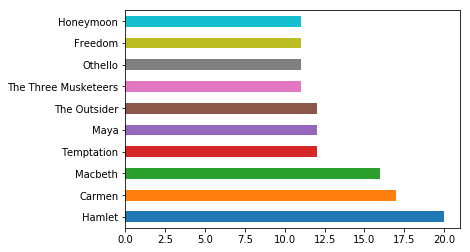

In [58]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [63]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [72]:
release_dates[release_dates.year>=2000].groupby('year').agg({'title':'count'}).sort_values(by='title',ascending=False).iloc[:3,:]

,title
year,
2016,17548
2014,17519
2015,16639


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

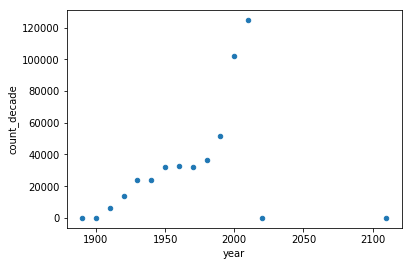

In [101]:
df_count=release_dates.groupby(release_dates.year//10*10).agg({'year':'count'})\
.rename(columns={'year':'count_decade'}).reset_index().sort_values(by='year')
df_count.plot(kind='scatter',x='year',y='count_decade')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [112]:
# A.
pd.value_counts(cast.character,dropna=True)[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [116]:
# B.
pd.value_counts(cast[cast.character=='Herself']['name'])[:10]

Queen Elizabeth II           12
Luisa Horga                   9
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
Mar?a Isabel (III) Mart?n     6
Sumie Sakai                   6
Marilyn Monroe                6
Oprah Winfrey                 6
Name: name, dtype: int64

In [117]:
# C.
pd.value_counts(cast[cast.character=='Himself']['name'])[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [126]:
pd.value_counts(cast[cast.character.str.startswith('Zombie')]['character'],dropna=True)[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [127]:
pd.value_counts(cast[cast.character.str.startswith('Police')]['character'],dropna=True)[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

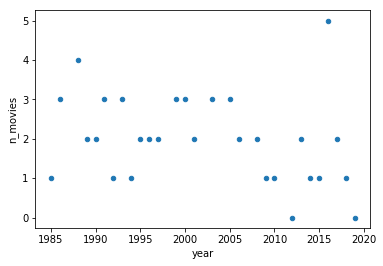

In [140]:
cast.head()
df_q5=cast[cast.name=='Keanu Reeves'].groupby('year',as_index=False).agg({'n':'count'}).rename(columns={'n':'n_movies'})
df_q5
df_q5.plot(kind='scatter',x='year',y='n_movies')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


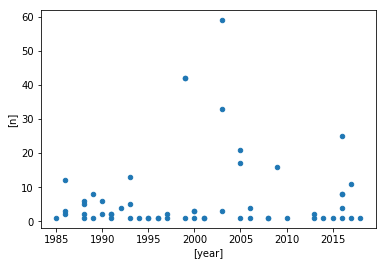

In [161]:
cast.head()
df_q6=cast[cast.name.str.contains("Keanu Reeves")].sort_values(by='year')
df_q6.plot(kind='scatter',x=['year'],y=['n'])

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

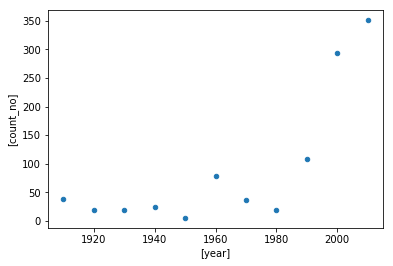

In [203]:
cast.head()
df_q7=cast[cast.title.str.contains('Hamlet')].groupby(cast.year//10*10).agg({'year':'count'}).rename(columns={'year':'count_no'})
df_q7=df_q7.reset_index()
df_q7.plot(kind='scatter',x=['year'],y=['count_no'])

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [ ]:
# A.
cast[(cast.year>=1960) & (cast.year<=1969) & (cast.n==1)].groupby(cast.type).size() 

In [ ]:
# B.
cast[(cast.year>=2000) & (cast.year<=2009) & (cast.n==1)].groupby(cast.type).size() 

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
cast.head()
df_9=cast[cast.name=='Frank Oz'].groupby(cast.year).agg({'year':'count'}).rename(columns={'year':'count_film'}).reset_index()
# df_9.reset_index()
df_9[df_9.count_film >1]

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [ ]:
df_q10=pd.DataFrame(cast[cast.name=='Frank Oz']['character'].value_counts())
df_q10[df_q10.character>=2].index
# pd.DataFrame(cast[cast.name=='Frank Oz']['character'].value_counts())

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

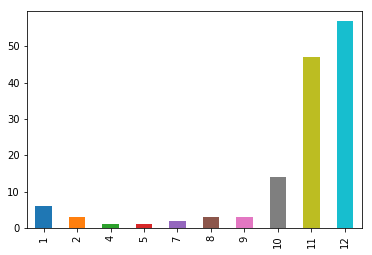

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

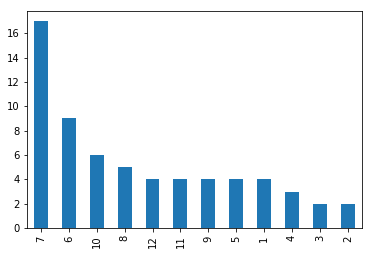

In [9]:
release_dates.head()
df_q1=release_dates[release_dates.title.str.contains('Summer') & (release_dates.country=='USA')]
df_q1.date.dt.month.value_counts().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

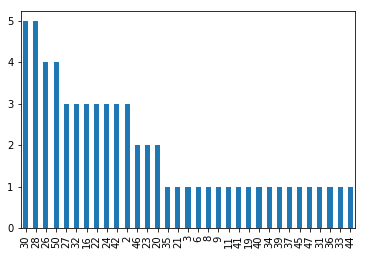

In [8]:
df_q1=release_dates[release_dates.title.str.contains('Summer') & (release_dates.country=='USA')]
df_q1.date.dt.week.value_counts().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [7]:
 cast.head()
df_q2=cast[(cast.name=='Keanu Reeves') & (cast.n==1)]
# print(df_q2.shape)
pd.merge(left=df_q2,right=release_dates[release_dates.country=='USA'],how='inner',on='title').sort_values(by='date')

,title,year_x,name,type,character,n,year_y,country,date
14,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1922,USA,1922-10-22
15,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1936,USA,1936-05-08
18,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0,1968,USA,1968-02-08
24,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,1988,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991,USA,1991-07-19
13,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,1993,USA,1994-05-25
16,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1994,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,1995,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995,USA,1995-08-11


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

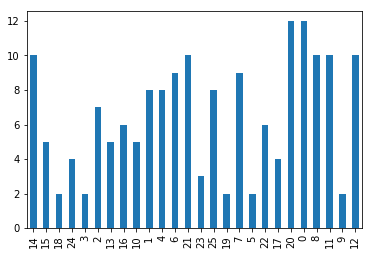

In [10]:
pd.merge(left=df_q2,right=release_dates[release_dates.country=='USA'],how='inner',on='title').sort_values(by='date').date\
.dt.month.plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

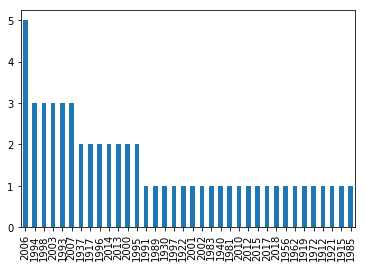

In [22]:
pd.merge(cast[cast.name.str.contains('Ian McKellen')],release_dates[release_dates.country=='USA'],how='inner',on='title')['date']\
.dt.year.value_counts().plot(kind='bar')